In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [3]:
df = df.drop(['ID', 'Dt_Customer'], axis=1)

In [4]:
imputer = SimpleImputer(strategy='mean')
df['Income'] = imputer.fit_transform(df[['Income']])

In [5]:
categorical_features = ['Education', 'Marital_Status']
numerical_features = df.drop(categorical_features, axis=1).columns

In [6]:
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [7]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

In [8]:
X_processed = preprocessor.fit_transform(df)

In [9]:
# --- Elbow Method to find the optimal number of clusters ---
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_processed)
    inertia.append(kmeans.inertia_)

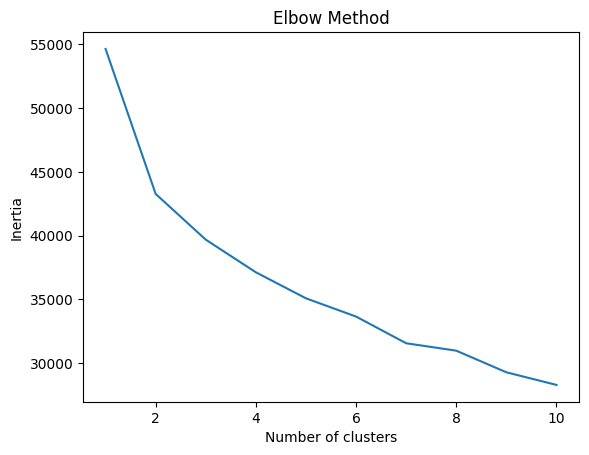

In [13]:
# Plot the Elbow Method graph
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig('elbow_method.png')
plt.show()
plt.close()

In [14]:
# Based on the elbow plot, let's choose 4 clusters
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X_processed)

In [15]:
df['Cluster'] = clusters

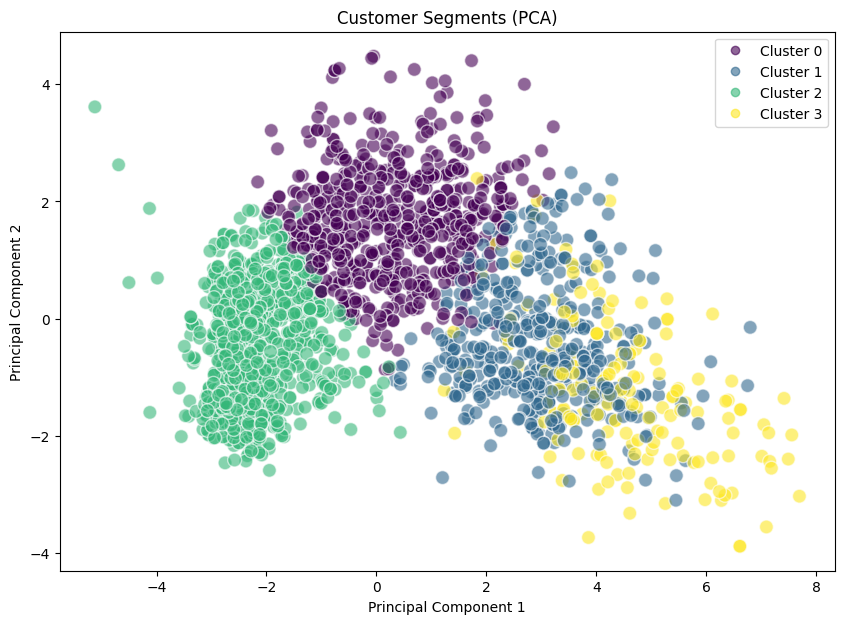

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6, edgecolors='w', s=100)
plt.title('Customer Segments (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(n_clusters)])
plt.savefig('customer_segments_pca.png')
plt.show()
plt.close()

In [19]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Group by 'Cluster' and compute the mean of numeric features
cluster_analysis = numeric_df.groupby(df['Cluster']).mean()

print(cluster_analysis)


          Year_Birth        Income   Kidhome  Teenhome    Recency    MntWines  \
Cluster                                                                         
0        1964.160862  57201.739236  0.237148  0.941957  48.233831  446.958541   
1        1967.893570  74028.266087  0.048780  0.230599  49.498891  491.611973   
2        1971.877833  34684.071690  0.808867  0.433498  49.334975   39.417734   
3        1969.356725  81579.611127  0.052632  0.128655  49.830409  874.701754   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
Cluster                                                                 ...   
0        19.784411       126.509121        27.323383         20.278607  ...   
1        71.758315       431.168514       105.124169         71.354767  ...   
2         4.901478        22.665025         6.890640          4.940887  ...   
3        56.426901       469.128655        77.052632         65.479532  ...   

         AcceptedCmp3  AcceptedCmp4  A